In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [11]:
df = pd.read_csv("Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3167,3168,15583137,Pope,637,France,Female,48,7,130806.99,2,1,1,132005.85,1
1729,1730,15643824,Johnston,637,France,Male,33,0,132255.99,2,0,1,74588.41,0
3216,3217,15742204,Hsu,579,Germany,Male,31,6,139729.54,1,0,1,135815.38,0
7364,7365,15641733,Mishina,671,France,Female,34,5,164757.56,1,1,0,110748.88,0
8399,8400,15749365,Earle,543,France,Female,34,8,0.00,2,0,1,145601.80,0


In [12]:
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis='columns',inplace=True)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [16]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [25]:
df1 = pd.get_dummies(data=df, columns=['Geography', 'Gender'])

In [26]:
df1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [27]:
df2_scale = ['CreditScore', 'Balance', 'EstimatedSalary']

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[df2_scale] = scaler.fit_transform(df1[df2_scale])

In [33]:
df1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,42,2,0.000000,1,1,1,0.506735,1,1,0,0,1,0
1,0.516,41,1,0.334031,1,0,1,0.562709,0,0,0,1,1,0
2,0.304,42,8,0.636357,3,1,0,0.569654,1,1,0,0,1,0
3,0.698,39,1,0.000000,2,0,0,0.469120,0,1,0,0,1,0
4,1.000,43,2,0.500246,1,1,1,0.395400,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,39,5,0.000000,2,1,0,0.481341,0,1,0,0,0,1
9996,0.332,35,10,0.228657,1,1,1,0.508490,0,1,0,0,0,1
9997,0.718,36,7,0.000000,1,0,1,0.210390,1,1,0,0,1,0
9998,0.844,42,3,0.299226,2,1,0,0.464429,1,0,1,0,0,1


In [34]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [35]:
X = df1.drop('Exited',axis='columns')
y = df1['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=5)

In [37]:
X_train.shape

(5000, 13)

In [42]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(13,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(13, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
157/157 [==============================] - 1s 1ms/step - loss: 0.7156 - accuracy: 0.7226
Epoch 2/100
157/157 [==============================] - 0s 1ms/step - loss: 0.4939 - accuracy: 0.7972
Epoch 3/100
157/157 [==============================] - 0s 1ms/step - loss: 0.4698 - accuracy: 0.7982
Epoch 4/100
157/157 [==============================] - 0s 1ms/step - loss: 0.4532 - accuracy: 0.8062
Epoch 5/100
157/157 [==============================] - 0s 1ms/step - loss: 0.4447 - accuracy: 0.8092
Epoch 6/100
157/157 [==============================] - 0s 1ms/step - loss: 0.4384 - accuracy: 0.8144
Epoch 7/100
157/157 [==============================] - 0s 1ms/step - loss: 0.4389 - accuracy: 0.8150
Epoch 8/100
157/157 [==============================] - 0s 1ms/step - loss: 0.4367 - accuracy: 0.8146
Epoch 9/100
157/157 [==============================] - 0s 1ms/step - loss: 0.4361 - accuracy: 0.8124
Epoch 10/100
157/157 [==============================] - 0s 1ms/step - loss: 0.4338 - accura

In [43]:
model.evaluate(X_test, y_test)

157/157 [==============================] - 0s 1ms/step - loss: 0.3548 - accuracy: 0.8556


[0.35476720333099365, 0.8555999994277954]

In [44]:
yp = model.predict(X_test)
yp[:5]

157/157 [==============================] - 0s 757us/step


array([[0.01520142],
       [0.05174157],
       [0.05167618],
       [0.06594452],
       [0.03712773]], dtype=float32)

In [45]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [46]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [47]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [48]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      3977
           1       0.75      0.44      0.55      1023

    accuracy                           0.86      5000
   macro avg       0.81      0.70      0.73      5000
weighted avg       0.85      0.86      0.84      5000



Text(69.0, 0.5, 'Truth')

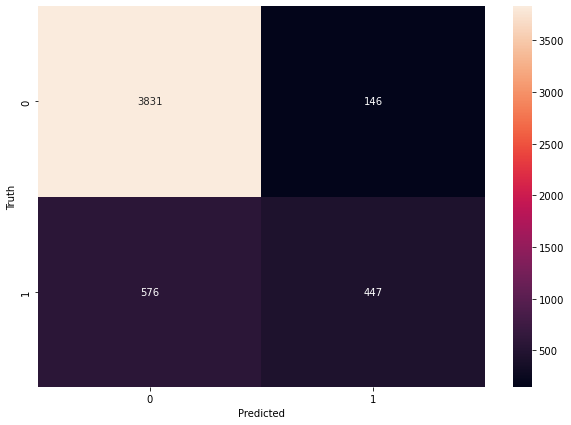

In [49]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
y_test.shape

(5000,)

In [51]:
round((3831+447)/(3831+447+576+146),2)

0.86

In [52]:
round(3831/(3831+576),2)

0.87

In [53]:
round(447/(447+146),2)

0.75

In [54]:
round(3831/(3831+146),2)

0.96